In [1]:
allure_etudier=1

In [2]:
import sys
sys.path.insert(0, "C:/projets_python/diabolo")
import warnings
warnings.filterwarnings("ignore")

In [3]:
from math import *

#LIBRAIRIES PERSO
import etude_variable.jouer as jj




# LIBRAIRIE PYHTON CLASSIQUES
import pandas as pd
import numpy as np
import matplotlib
import scipy
import platform
from collections import Counter
#ESTIMATEUR
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn import neighbors, datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier


#TRAINING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import dask_searchcv as dcv
from skopt.space import Real, Integer
from sklearn.model_selection import cross_validate

#Evaluateur
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectFromModel


from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.utils import class_weight

#outils
from dask.diagnostics import ProgressBar
import logging
from datetime import datetime


#Metriques
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn import  metrics
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  classification_report

#Outils

import time


#Graphique
from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sns

print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)
print('scipy version is.......', scipy.__version__)


Operating system version.... Windows-10-10.0.17134-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0
Operating system version.... Windows-10-10.0.17134-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0


In [4]:
def load_mymodel(allure):
    from sklearn.externals import joblib
    print("Restauration modele ...")
    clf = joblib.load('diabolo' + str(allure) + '.pkl')
    return clf

    
load_mymodel(1)    

Restauration modele ...


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
       colsample_bytree=0.7, gamma=0.0, learning_rate=0.04,
       max_delta_step=3, max_depth=14, max_features='sqrt',
       min_child_weight=6, missing=nan, n_estimators=1330, n_jobs=3,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=1e-05, reg_lambda=5.0, scale_pos_weight=1, seed=100,
       silent=False, subsample=1)

In [5]:

xnames =jj.get_names()
xnames2 = jj.get_names2()

# xnames 2 = nouvelles colonnes du fichier transformé
# p2018 a été ajouté, SELECTION a été ajouté

df2=jj.restauration(allure_etudier=allure_etudier,xnames2=xnames2)

print(df2.info())




2018-07-20 14:39:58.790137

 Time taken: 0 hours 0 minutes and 1.87 seconds.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 238974 entries, 14 to 490294
Data columns (total 53 columns):
CO_PRIX                      238974 non-null int64
HIPPO                        238974 non-null int64
IDCOURSE                     238974 non-null int64
IDPARTCIPANT                 238974 non-null int64
PAR_AGE                      238974 non-null int64
PAR_CARRIERE                 238974 non-null int64
PAR_CARRIERE_Q               238974 non-null float64
PAR_CLASSE_AGE               238974 non-null float64
PAR_COTEDER                  238974 non-null int64
PAR_ENT_ECART_GAGNANT        238974 non-null int64
PAR_ENT_RAPPORT_GAGNANT_M    238974 non-null float64
PAR_ENT_REU_PLACE            238974 non-null float64
PAR_ENT_REUSSITE_GAGNE       238974 non-null float64
PAR_ENT_VICTOIRE             238974 non-null float64
PAR_GAIN                     238974 non-null float64
pAR_JOC_ECART_GAGNANT        238

In [6]:
#df2=jj.conversion(df2)  <<<<<<<<<<<<<<<<< INUTILE POUR LE MOMENT !!!!!!!!!!!!!!!!!!!
#df2 = jj.encodage(df2)

scalerise=0
#print(df2.head(2))

In [7]:





df2['SELECTION2']=df2['SELECTION2'].astype('float')
df2['SELECTION2']=df2['SELECTION2'].astype('int')
df2 = jj.suppression_colonne(df2=df2,allure=0)
df2 = jj.suppression_colonne(df2=df2,allure=allure_etudier)


#df2=df2[ ['SELECTION2','PAR_REUSSITE_3P','p2018','PAR_REUSSITE_GAGNE' ,'IDPARTCIPANT', 'IDCOURSE' ]]


Suppression colonnne  0
Suppression colonnne  1


In [8]:

# Creating bins for the win column
def assign_selection2(W):
    if W==1:
        return 1
    if W==0:
        return 0
    
    


Lib_features_df = df2.columns
xdata = df2.values

df_gagnant = pd.DataFrame(data=xdata, columns=Lib_features_df)


df_gagnant['SELECTION'] = df_gagnant['SELECTION2'].apply(assign_selection2)
df_gagnant.drop(["SELECTION2"], axis=1, inplace=True)

index_col = ['IDPARTCIPANT', 'IDCOURSE']
df_gagnant = df_gagnant.set_index(index_col)
df_gagnant_len = len(df_gagnant.columns) - 1
Lib_features = df_gagnant.columns[:df_gagnant_len]

feature_columns = Lib_features  ##<<<<<<<<<<<<<<<<
response_column = ['SELECTION']  ##<<<<<<<<<<<<<<<<

print("DEFINITION DE LA STRUCTURE ---------------------------------------------------------")
print("(1) Shape df_gagnant  ", df_gagnant.shape,"\n")
print("(2) FEATURES ",Lib_features)
print("(3) response column ",response_column)
# df_gagnant, feature_columns, response_column, ratio SONT DEFINI


DEFINITION DE LA STRUCTURE ---------------------------------------------------------
(1) Shape df_gagnant   (238974, 27) 

(2) FEATURES  Index(['PAR_AGE', 'PAR_CARRIERE', 'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE',
       'PAR_JOC_PLACE_3P', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE',
       'pAR_JOC_VICTOIRE', 'PAR_NUM', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE',
       'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'Nb_partant',
       'PAR_ENT_ECART_PLACE', 'PAR_VICTOIRE', 'PAR_VICTOIRE_Q',
       'PAR_ENT_NB_COURSE', 'p2018'],
      dtype='object')
(3) response column  ['SELECTION']


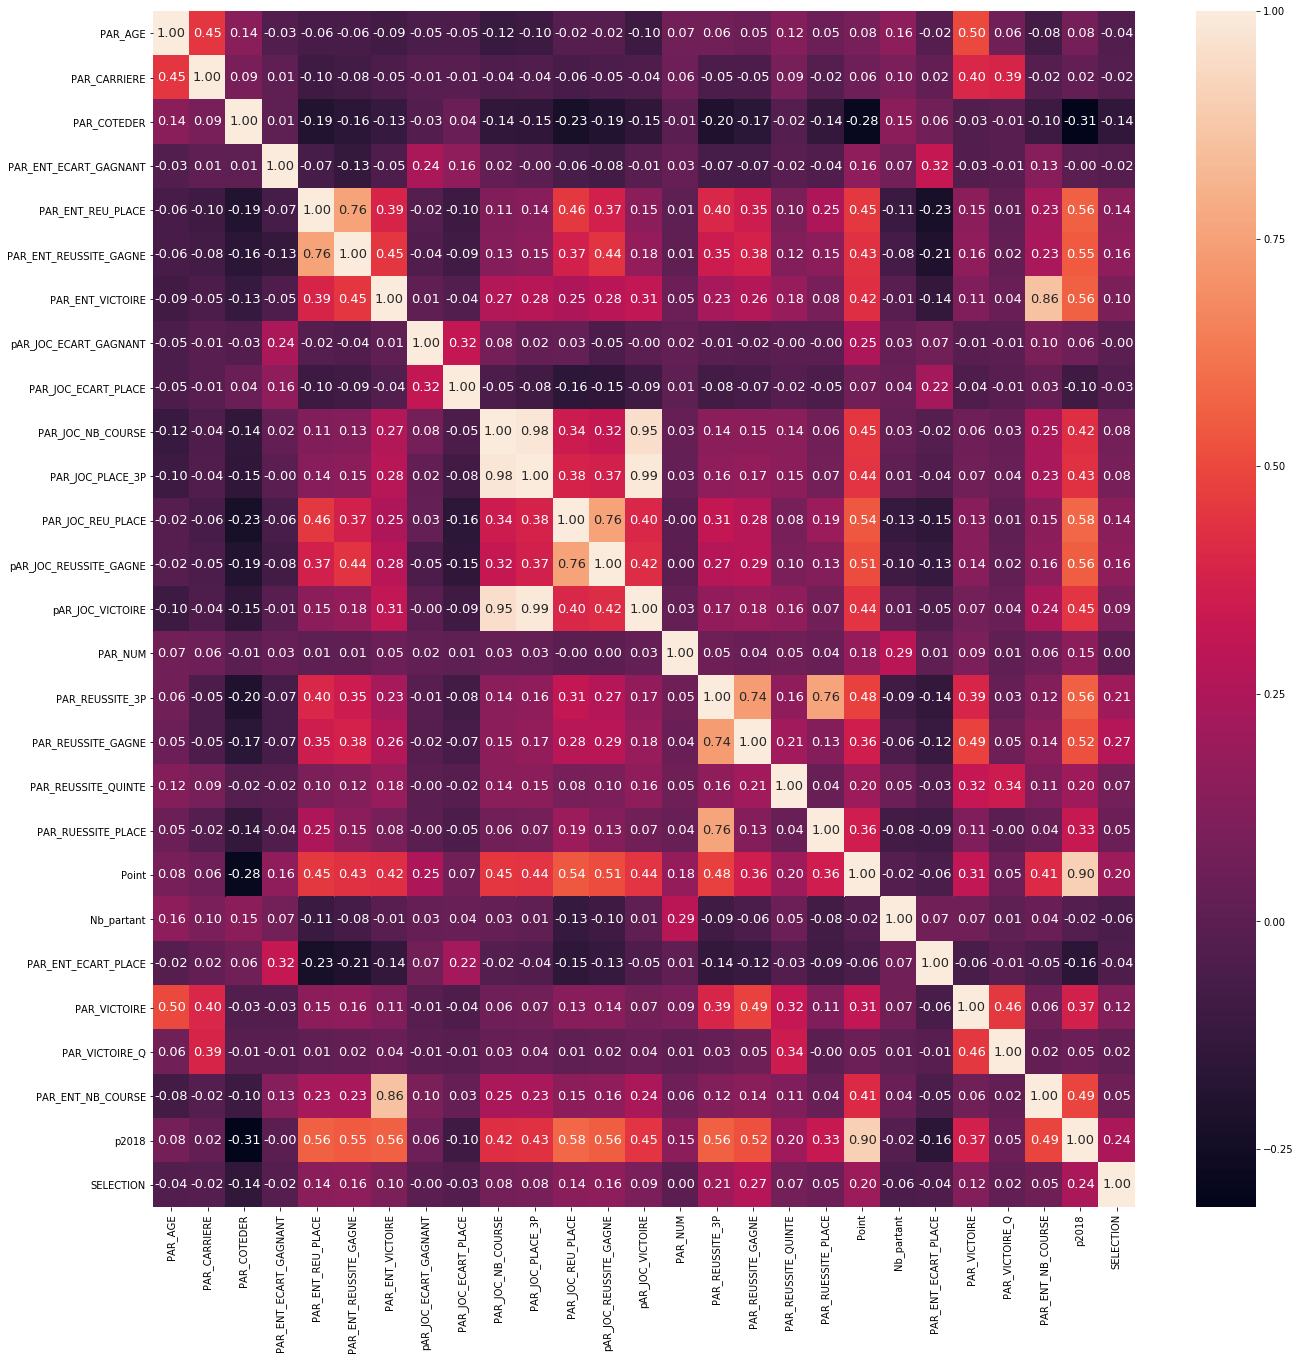

In [9]:

#Enfin, quelque chose de vraiment cool que vous pouvez mettre 
#dans une carte de chaleur est une matrice de corrélation. 
#Pandas DataFrame a une méthode corr qui calcule le coefficient de corrélation de Pearson (peut être un autre)
#entre tous les couples de colonnes numériques du DataFrame.

fig, ax = plt.subplots(figsize=(22,22))
sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=.0, ax=ax, annot_kws={"size": 13}, xticklabels = 1 )








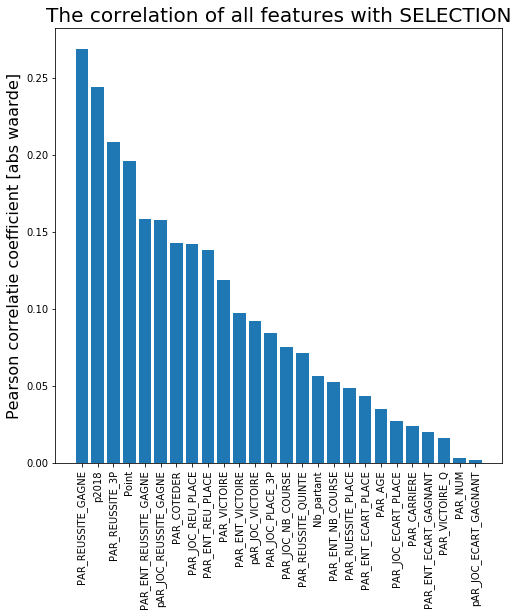

In [10]:
jj.display_corr_with_col(df_gagnant, 'SELECTION')

In [11]:
df_gagnant.describe()

,PAR_AGE,PAR_CARRIERE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,pAR_JOC_ECART_GAGNANT,PAR_JOC_ECART_PLACE,PAR_JOC_NB_COURSE,...,PAR_REUSSITE_QUINTE,PAR_RUESSITE_PLACE,Point,Nb_partant,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE,p2018,SELECTION
count,238974.000000,238974.000000,238974.000000,238974.000000,238974.000000,238974.000000,238974.00000,238974.000000,238974.000000,238974.000000,...,238974.000000,238974.000000,238974.000000,238974.000000,238974.000000,238974.000000,238974.000000,238974.000000,238974.000000,238974.000000
mean,5.374995,46.050508,32.864337,9.909676,0.209126,0.066166,13.72628,9.202373,3.655117,195.386732,...,0.001028,0.178109,160.209814,14.219949,3.627713,4.443186,0.077849,154.043992,112.899706,0.074368
std,1.914173,54.734208,45.795765,13.707159,0.125057,0.065330,22.82120,12.746244,5.264384,318.066272,...,0.006477,0.102546,54.515111,2.481492,5.190455,5.184835,1.416058,186.129648,47.443908,0.262369
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,22.000000,8.000000,0.000000,0.130000,0.020000,1.00000,0.000000,0.000000,21.000000,...,0.000000,0.115385,123.250000,12.000000,0.000000,1.000000,0.000000,32.000000,78.451577,0.000000
50%,5.000000,40.000000,18.000000,5.000000,0.200000,0.050000,5.00000,4.000000,2.000000,66.000000,...,0.000000,0.169014,162.000000,14.000000,2.000000,3.000000,0.000000,91.000000,109.780807,0.000000
75%,7.000000,64.000000,38.000000,14.000000,0.280000,0.090000,14.00000,13.000000,5.000000,196.000000,...,0.000000,0.230769,198.000000,16.000000,5.000000,6.000000,0.000000,183.000000,144.640312,0.000000
max,15.000000,6600.000000,3585.000000,122.000000,1.000000,1.000000,148.00000,173.000000,71.000000,1595.000000,...,0.227273,1.000000,374.000000,18.000000,55.000000,847.000000,495.000000,898.000000,292.326693,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002903692D1D0>,
      dtype=object)

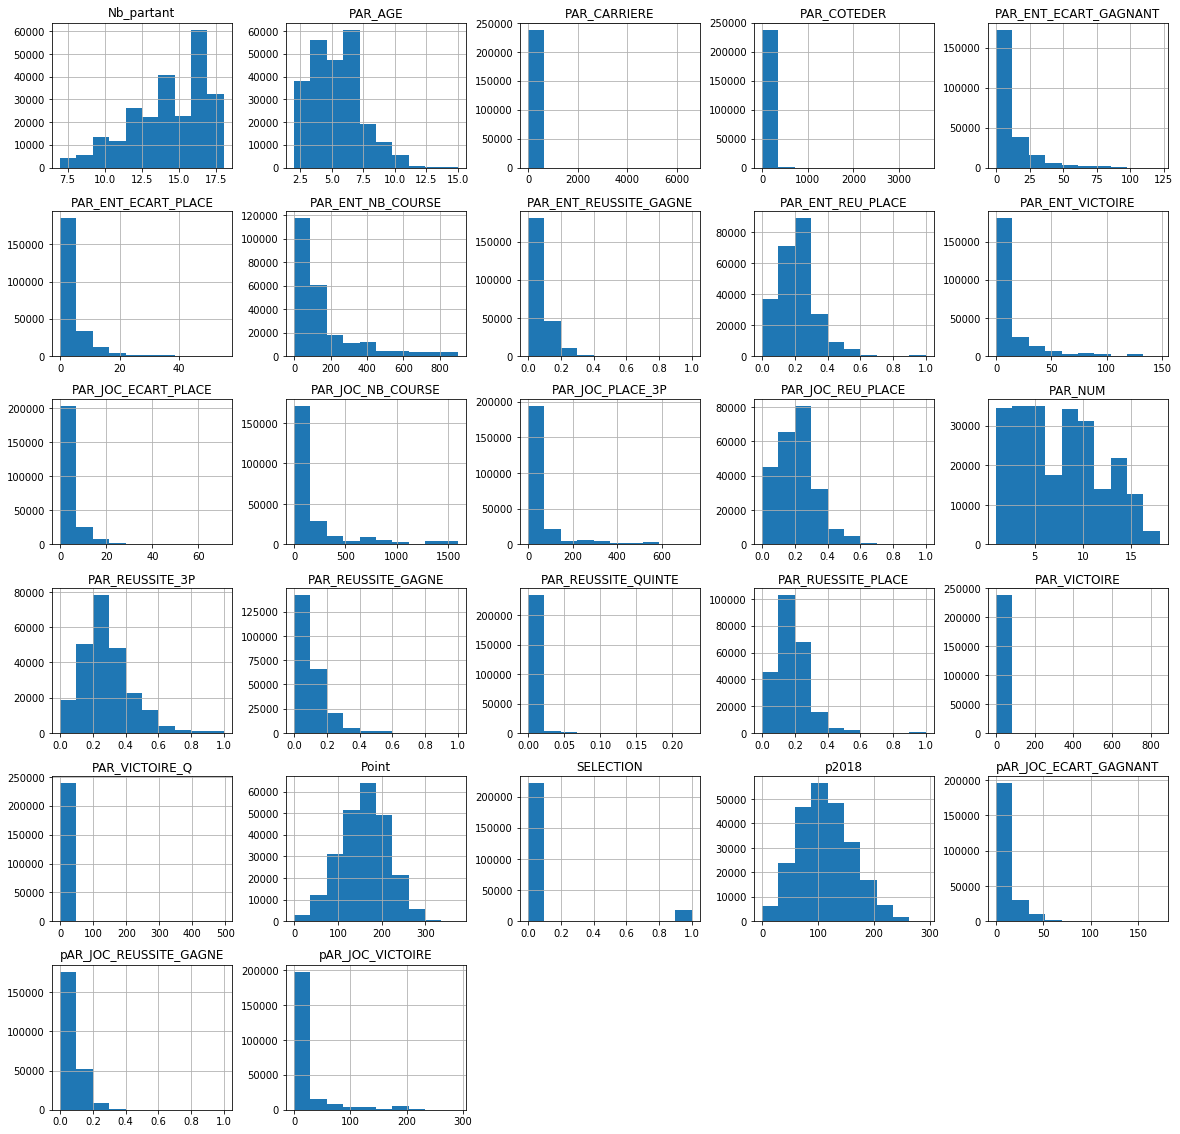

In [12]:
df_gagnant.hist( figsize = (20,20))


Proportion: 12.45 : 1
Total number of records : 238974 
Nombre de participations avec SELECTION = 0 : 221202
Nombre de participations avec SELECTION = 1  : 17772
Pourcentage 0: 92.5632%,  pourcentage 1 : 7.4368%


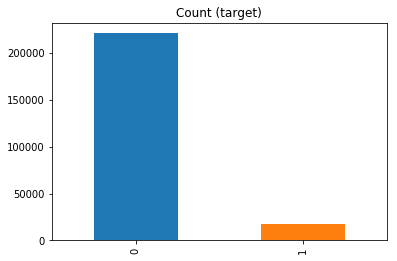

In [13]:

target_count = df_gagnant['SELECTION'].value_counts()

print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)')
normal_trans_perc = sum(df_gagnant['SELECTION'] == 0) / (sum(df_gagnant['SELECTION'] == 0) + sum(df_gagnant['SELECTION'] == 1))
fraud_trans_perc = 1 - normal_trans_perc
print('Total number of records : {} '.format(len(df_gagnant)))
print('Nombre de participations avec SELECTION = 0 : {}'.format(sum(df_gagnant['SELECTION'] == 0)))
print('Nombre de participations avec SELECTION = 1  : {}'.format(sum(df_gagnant['SELECTION'] == 1)))
print('Pourcentage 0: {:.4f}%,  pourcentage 1 : {:.4f}%'.format(normal_trans_perc * 100,fraud_trans_perc * 100))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002903AB0AF98>,
      dtype=object)

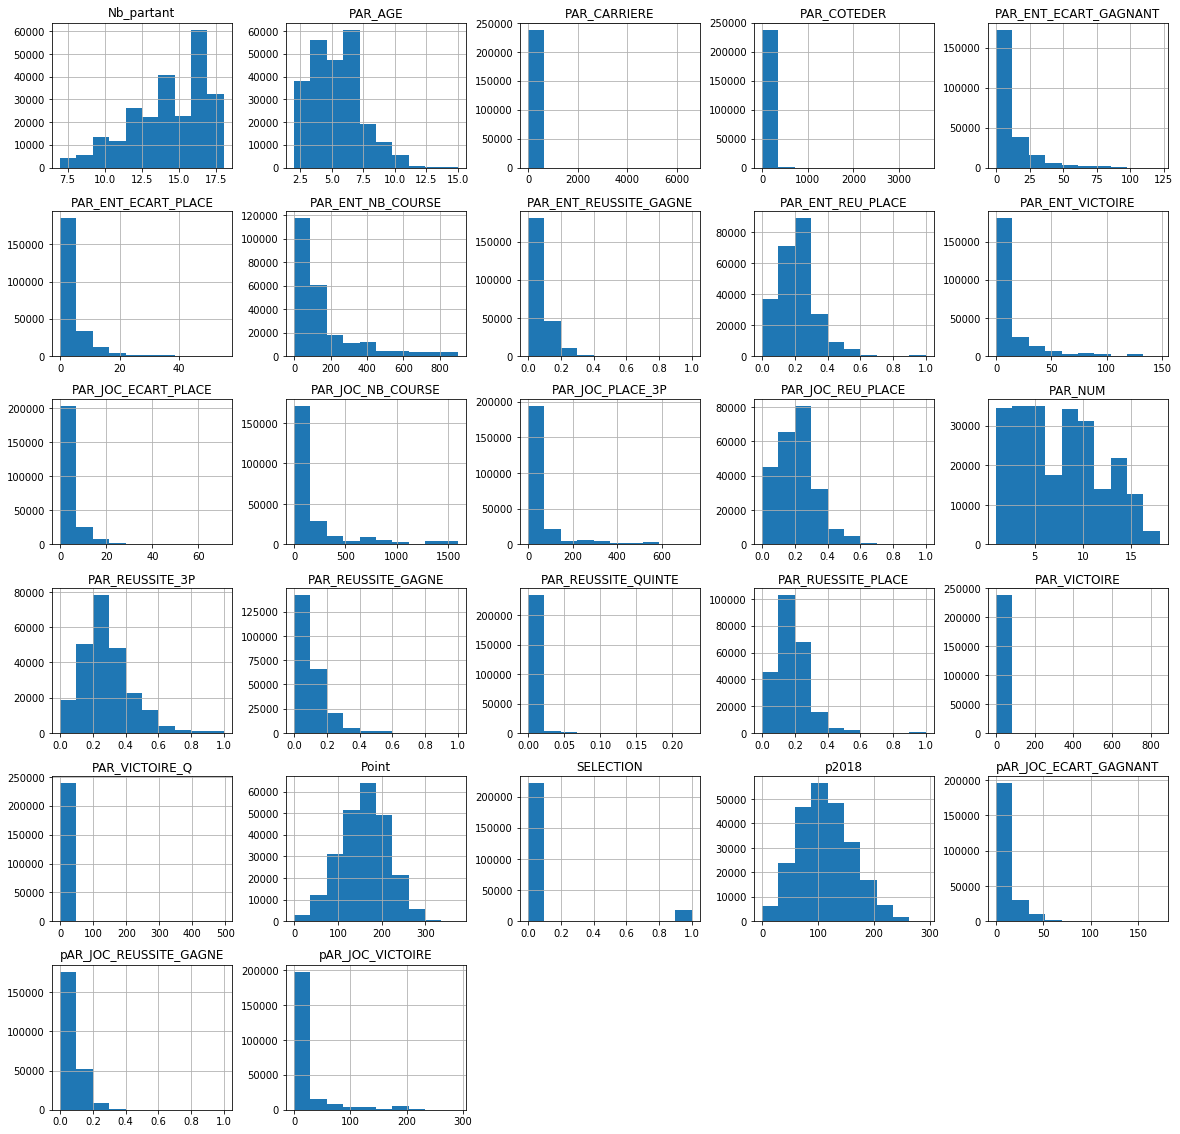

In [14]:
df_gagnant.hist( figsize = (20,20))

In [15]:

#train_x, test_x, train_y, test_y = jj.split_data2(df_gagnant, feature_columns,response_column)
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_gagnant[feature_columns],df_gagnant[response_column], test_size=0.30, random_state=42)

train_eval_X = df_gagnant[feature_columns]
train_eval_Y = df_gagnant[response_column]
print("SPLIT des données ....\n")

print("Train_x", train_x.shape)
print("Train y", train_y.shape)
print("")
print("Test x", test_x.shape)
print("Test y", test_y.shape)

#print("train_eval_X", train_eval_X.shape)
#print("train_eval_Y", train_eval_Y.shape)

#test_y = test_y['SELECTION'].ravel()
#train_y = train_y['SELECTION'].ravel()

train_x, train_y = jj.smot2(train_x=train_x, train_y=train_y, feature_columns=feature_columns)

print("apres SMOT2")
print("Train_x", train_x.shape)
print("Train y", train_y.shape)
#test_x, test_y = smot2(train_x=test_x, train_y=test_y, feature_columns=feature_columns)


SPLIT des données ....

Train_x (167281, 26)
Train y (167281, 1)

Test x (71693, 26)
Test y (71693, 1)
2018-07-20 14:40:10.478884
Fin SMOT

 Time taken: 0 hours 0 minutes and 2.81 seconds.
apres SMOT2
Train_x (309315, 26)
Train y (309315,)


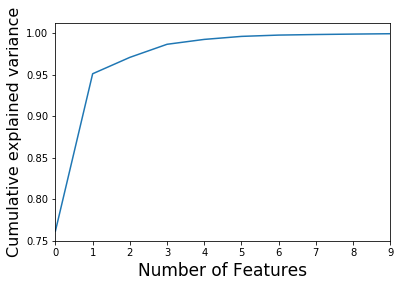

In [16]:
from sklearn.decomposition import PCA 

pca = PCA().fit(train_x)
var_ratio = pca.explained_variance_ratio_
components = pca.components_
#print(pca.explained_variance_)
plt.plot(np.cumsum(var_ratio))
plt.xlim(0,9,1)
plt.xlabel('Number of Features', fontsize=17)
plt.ylabel('Cumulative explained variance', fontsize=16)
plt.show()

In [17]:
 #jj.smote_valid(model,train_eval_X, train_eval_Y)

In [18]:

model=jj.get_estimator (allure_etudier) 

In [19]:
model=jj.fit_estimator(model,train_x,train_y, test_x,test_y)



recherche par modele
2018-07-20 14:40:13.930768
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.3, learning_rate=0.03,
       max_delta_step=4, max_depth=11, max_features=18,
       min_child_weight=12, missing=None, n_estimators=1650, n_jobs=3,
       nthread=None, objective='binary:logistic', random_state=10,
       reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=400,
       silent=False, subsample=0.9)
fit
FIN recherche par modele

 Time taken: 0 hours 4 minutes and 29.24 seconds.


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


>>>>>>>>>>  Accuracy: 92.766%
             precision    recall  f1-score   support

          0       0.93      0.99      0.96     66394
          1       0.55      0.11      0.19      5299

avg / total       0.91      0.93      0.90     71693




                        importance
feature                           
PAR_COTEDER                  0.081
p2018                        0.069
Nb_partant                   0.057
PAR_REUSSITE_GAGNE           0.053
PAR_ENT_NB_COURSE            0.053
PAR_AGE                      0.053
PAR_CARRIERE                 0.051
Point                        0.051
PAR_NUM                      0.048
PAR_VICTOIRE                 0.046
PAR_RUESSITE_PLACE           0.044
PAR_JOC_NB_COURSE            0.040
PAR_JOC_ECART_PLACE          0.038
PAR_ENT_ECART_PLACE          0.038
PAR_REUSSITE_3P              0.037
PAR_ENT_ECART_GAGNANT        0.031
PAR_ENT_REU_PLACE            0.029
PAR_ENT_VICTOIRE             0.028
pAR_JOC_ECART_GAGNANT        0.028
PAR_JOC_REU_PLACE            0.027
PAR_ENT_REUSSITE_GAGNE       0.026
pAR_JOC_REUSSITE_GAGNE       0.024
PAR_JOC_PLACE_3P             0.023
pAR_JOC_VICTOIRE             0.018
PAR_REUSSITE_QUINTE          0.003
PAR_VICTOIRE_Q               0.002


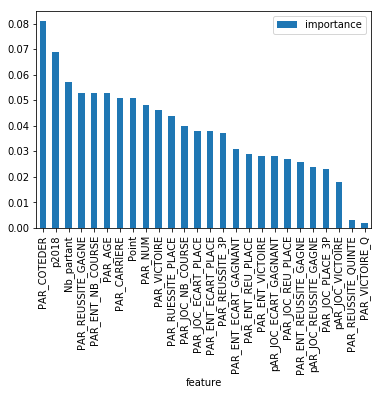

In [20]:
jj.plot_importance(feature_columns=feature_columns,model=model)


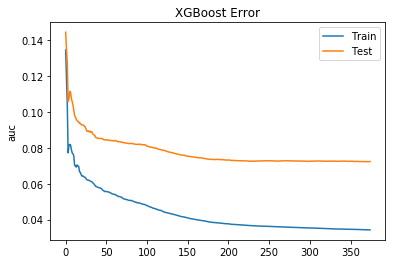

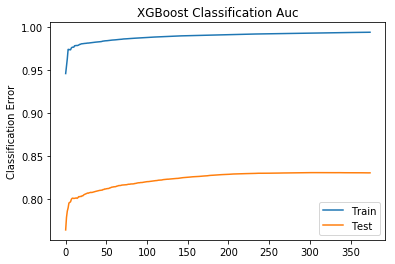

In [21]:

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

 # plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('auc')
pyplot.title('XGBoost Error')
pyplot.show()
        # plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Auc')
pyplot.show()


In [22]:
#jj.affiche_evalSet(model,train_x,train_y,test_x,test_y,1)


#jj.affiche_evalSet(mybest_model=model,set_train=train_x,set_train_cible=train_y,set_test=test_x,set_test_cible=test_y,type_eval=2)




In [23]:

df_numero_a_predire = jj.lecture_data('d:\data_jour.csv', xnames, ['IDPARTCIPANT', 'IDCOURSE'],allure=allure_etudier,avec_index=False)

print("Fichier lu d:\data_jour.csv" )
df_numero_a_predire = df_numero_a_predire.groupby("ALLURE")
df_numero_a_predire = df_numero_a_predire.get_group(allure_etudier)


#calcul des point p2018 pour la journée 

df2_journee=jj.calcul_les_notes(df=df_numero_a_predire,allure=allure_etudier)

#df2_journee = jj.encodage(df2_journee)

#suppression de quelques colonnnes
df2_journee = jj.suppression_colonne(df2=df2_journee,allure=0)
df2_journee = jj.suppression_colonne(df2=df2_journee,allure=allure_etudier)

df2_journee['SELECTION'] = 0

    


Fichier lu d:\data_jour.csv
2018-07-20 14:44:47.399669

 Time taken: 0 hours 0 minutes and 0.0 seconds.
    print(N°  0 None
Suppression colonnne  0
Suppression colonnne  1


In [24]:

df2_journee=df2_journee.set_index( ['IDPARTCIPANT', 'IDCOURSE'])




                


In [25]:
train_x, test_x, train_y, test_y = jj.split_dataset(df2_journee, 0, feature_columns, response_column)

    
test_x.head(10)    

,,PAR_AGE,PAR_CARRIERE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,pAR_JOC_ECART_GAGNANT,PAR_JOC_ECART_PLACE,PAR_JOC_NB_COURSE,...,PAR_REUSSITE_GAGNE,PAR_REUSSITE_QUINTE,PAR_RUESSITE_PLACE,Point,Nb_partant,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE,p2018
IDPARTCIPANT,IDCOURSE,,,,,,,,,,,,,,,,,,,,,
1231643,99377,5,30,5,4,0.24,0.07,3.0,0,0,12.0,...,0.166667,0.0,0.066667,98,15,1,5.0,0,41.0,79.070492
1231602,99375,6,57,25,10,0.18,0.07,10.0,8,1,698.0,...,0.017544,0.0,0.105263,130,18,10,1.0,0,135.0,93.483556
1231272,99347,6,32,24,13,0.33,0.12,42.0,15,10,143.0,...,0.218750,0.0,0.218750,192,16,8,7.0,0,346.0,162.193848
1231317,99350,5,37,23,26,0.15,0.04,4.0,0,1,30.0,...,0.027027,0.0,0.081081,97,16,2,1.0,0,90.0,48.402149
1231587,99374,7,29,9,13,0.25,0.09,20.0,12,3,47.0,...,0.137931,0.0,0.310345,144,13,0,4.0,0,202.0,102.349821
1231810,99392,8,60,11,29,0.19,0.06,24.0,20,0,88.0,...,0.133333,0.0,0.183333,179,14,2,8.0,0,396.0,147.449545
1231755,99387,10,98,12,3,0.18,0.05,30.0,13,12,198.0,...,0.132653,0.0,0.142857,172,15,0,13.0,0,545.0,125.917826
1231731,99385,4,21,13,7,0.24,0.08,11.0,2,1,131.0,...,0.190476,0.0,0.285714,191,10,1,4.0,0,128.0,121.967222
1231766,99388,8,72,21,18,0.25,0.04,1.0,23,0,141.0,...,0.125000,0.0,0.305556,164,13,0,9.0,0,24.0,107.574930


In [26]:



test_y = test_y['SELECTION'].ravel()
y_pred = model.predict(test_x)
y_pred

df_pred = pd.DataFrame.from_dict(y_pred)
test_copy = test_x.copy() #################
PROBA = model.predict_proba(test_x)

df_proba = pd.DataFrame.from_dict(PROBA)    
df_final = pd.concat([df_proba, df_pred], axis=1)
df_final.head(10)

c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,0,1,0
0,0.852371,0.147629,0
1,0.986448,0.013552,0
2,0.941403,0.058597,0
3,0.993828,0.006172,0
4,0.964214,0.035786,0
5,0.912037,0.087963,0
6,0.919563,0.080437,0
7,0.928445,0.071555,0
8,0.942465,0.057535,0
9,0.787337,0.212663,0


In [27]:
test_x = jj.drop_test(test_copy)

In [28]:
test_y = jj.copie_data(test_x=test_x, df_proba=df_proba,allure_etudier=allure_etudier)



2018-07-20 14:44:51.560012
Nomnre de lignes = 287
 FORMATION DU FICHIER pour  1

 Time taken: 0 hours 0 minutes and 31.02 seconds.
Fin copie


In [29]:

jj.ecrire_pour_diabolo(test_x=test_y,allure_etudier=allure_etudier)



 fin de copie sur Test_x                              v0        v1  sel
IDPARTCIPANT IDCOURSE                         
1231643      99377     0.852371  0.147629    0
1231602      99375     0.986448  0.013552    0
1231272      99347     0.941403  0.058597    0
1231317      99350     0.993828  0.006172    0
1231587      99374     0.964214  0.035786    0
1231810      99392     0.912037  0.087963    0
1231755      99387     0.919563  0.080437    0
1231731      99385     0.928445  0.071555    0
1231766      99388     0.942465  0.057535    0
1231681      99380     0.787337  0.212663    0
1231781      99389     0.944975  0.055025    0
1231818      99392     0.944581  0.055419    0
1231783      99389     0.970662  0.029338    0
1231613      99375     0.919367  0.080633    0
1231639      99377     0.992076  0.007924    0
1231327      99350     0.954496  0.045504    0
1231590      99374     0.959415  0.040585    0
1231601      99375     0.993517  0.006483    0
1231693      99381     0.887206  